# <h1><center> Schwakathon</center></h1>
## <h2><center>Keeping it in the Family</center></h2>
### <h3><center>Team E</center></h3>

### REI Modeling

In [50]:
from pandas import Series, DataFrame
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read and cleaning the data

In [51]:
df = pd.read_csv('Churn_Modelling(1).csv')

##### Drop unused features

In [52]:
df_2 = df.drop(['CustomerId','NumOfProducts',' Large S/P ', ' Large B/P ', ' Large ROE ', ' Large Return Rate in the last quarter ', ' Large Market Value '],axis =1)

##### Transform categorical variables into dummy variables (needed for random forest modeling)

In [53]:
df_2 = pd.get_dummies(df_2, columns=['InvestmentGoal', 'ModeCommunication'])

##### Split data into x and y for supervised learning

In [54]:
y = df_2.Exited
y = y.to_frame()

x = df_2.drop('Exited', axis = 1)

### Random Forest Modeling

In [55]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Display Important Features

In [56]:
feature_imp = pd.Series(clf.feature_importances_, index= x.columns.values).sort_values(ascending=False)
feature_imp

rating_trust                  0.378807
Frequency                     0.277884
Recency                       0.145592
Age                           0.051361
Financial_lit                 0.025411
comments                      0.021077
CreditScore                   0.011538
PortfolioSize                 0.011099
Advisor_Age                   0.007661
NumberOfClients               0.007205
Annual Return                 0.007061
Systematic Risk               0.006873
Tenure                        0.006223
Excess Return                 0.005976
rating_avail                  0.004619
rating_comm                   0.004522
Monetory                      0.003834
Gender                        0.003685
 Small systematic Risk        0.003324
rating_knowledge              0.002577
Children(Y/N)                 0.001597
InvestmentGoal_Education      0.001569
other_advisors                0.001499
ModeCommunication_skype       0.001384
InvestmentGoal_Retirement     0.001372
ModeCommunication_email  

#####  Predict the REI of the data

In [57]:
pred = clf.predict_proba(x)

In [58]:
REI = pred[:,1]
REI = pd.DataFrame(REI)
x['REI']= REI

#### Looking at the distribution of the REI we identified the thresholds of the high,low and medium risk

(array([7858.,   85.,   20.,    0.,    0.,    0.,   25.,   93.,   91.,
        1828.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

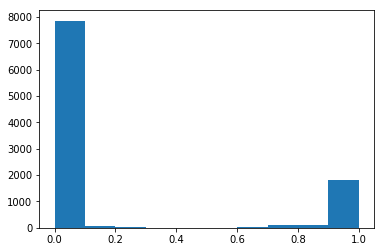

In [59]:
hist(x['REI'])

### XGBoost

In [60]:
x2 = x.drop(['REI'],axis =1)

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x2, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### Important XGBoost features

In [62]:
feature_imp_xg = pd.Series(model.feature_importances_, index= x2.columns.values).sort_values(ascending=False)
feature_imp_xg

rating_trust                  0.260586
Frequency                     0.244300
Recency                       0.192182
Age                           0.104235
Financial_lit                 0.087948
Gender                        0.026059
PortfolioSize                 0.022801
CreditScore                   0.016287
comments                      0.013029
InvestmentGoal_Retirement     0.006515
Excess Return                 0.006515
Advisor_Age                   0.003257
 Small systematic Risk        0.003257
ModeCommunication_phone       0.003257
NumberOfClients               0.003257
other_advisors                0.003257
rating_comm                   0.003257
Systematic Risk               0.000000
rating_knowledge              0.000000
Annual Return                 0.000000
Monetory                      0.000000
rating_avail                  0.000000
InvestmentGoal_Education      0.000000
Tenure                        0.000000
Children(Y/N)                 0.000000
Retired                  

#####  Get only the high-risk clients

In [63]:
# x2 = high risk clients
x2 = x[x['REI'] > 0.8]

##### Cluster within the high-risk group of clients

In [64]:
from sklearn.cluster import KMeans
#use 3 clusters
clus_num = 3
kmeans = KMeans(clus_num,random_state=50).fit(x2)


In [65]:
cluster1 = x2[kmeans.labels_==0]
cluster2 = x2[kmeans.labels_==1]
cluster3 = x2[kmeans.labels_==2]

### Questionnaire to client

##### Answers are taken into account to determine REI of client

In [66]:
print('*************************************************************************************')
print('*************************************************************************************')
print('\t\t\t\t\t\tTTPK ADVISORS')
print('*************************************************************************************')
print('\t\t\t\t\t\tQUESTIONAIRE')
print('*************************************************************************************')
print('*************************************************************************************')
print('Q1. How would you rate the expertise of your advisor from 1 to 5')
expertise = input()
print('Q2. How would you rate the communication with your advisor from 1 to 5')
communication = input()
print('Q3. How would you rate the level of trust with your advisor from 1 to 5')
trust = input()
print('Q4. How would you rate the availability of your advisor from 1 to 5')
availability = input()
print('Q5. How would you rate your financial literacy from 1 to 5')
fin_lit = input()
print('Q6. How many assets do you have assets outside this organization ?')
comp = input()
print('Comments:')
comments = input()

*************************************************************************************
*************************************************************************************
						TTPK ADVISORS
*************************************************************************************
						QUESTIONAIRE
*************************************************************************************
*************************************************************************************
Q1. How would you rate the expertise of your advisor from 1 to 5
1
Q2. How would you rate the communication with your advisor from 1 to 5
2
Q3. How would you rate the level of trust with your advisor from 1 to 5
3
Q4. How would you rate the availability of your advisor from 1 to 5
4
Q5. How would you rate your financial literacy from 1 to 5
5
Q6. How many assets do you have assets outside this organization ?
1
Comments:
Very good!


#####  Get a random test client

In [67]:
x[:5].to_csv('test_data.csv')

In [68]:
test_data = pd.read_csv('test_data.csv')

In [69]:
test_data = test_data.drop(['Financial_lit','rating_trust','other_advisors', 'rating_knowledge', 'rating_comm', 'rating_avail', 'REI'],axis =1)
test_data = test_data.drop(test_data.columns[0], axis=1)


##### Add answers of questionnaire to data

In [70]:
pip install vaderSentiment


The following command must be run outside of the IPython shell:

    $ pip install vaderSentiment

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


### Sentiment Analysis of customer feedback

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [72]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return score

In [73]:
compound_score = sentiment_analyzer_scores(comments)
compound_score

0.54

In [74]:
import random as random
test = pd.DataFrame(test_data.iloc[random.randint(0,4)]).transpose()
test
test['Financial_lit']=fin_lit
test['rating_trust']= trust
test['other_advisors']=comp
test['rating_knowledge']= expertise
test['rating_comm']=communication
test['rating_avail']= availability
test['comments'] = compound_score

### Predict REI of test client

In [77]:
pred2 = clf.predict_proba(test)
pred2[:,1]
if(pred2[:,1] >0.8):
    print('High Risk')
elif(pred2[:,1]<0.2):
    print('Low Risk')
else:
    print('Medium Risk')

Medium Risk


In [78]:
test_clust = test
test_clust['REI'] = pred2[:,1]

##### Determine which cluster the test client belongs to

In [79]:
kmeans.predict(test)

array([0])

In [80]:
x.to_csv('RandomForest_data.csv')
cluster1.to_csv('cluster1.csv')
cluster2.to_csv('cluster2.csv')
cluster3.to_csv('cluster3.csv')

#### Cluster attributes

In [81]:
cluster1_data = cluster1.drop(['REI'],axis =1)
cluster1_y = cluster1['REI']
from sklearn import linear_model
reg1 = linear_model.LinearRegression(fit_intercept = False)
reg1.fit(cluster1_data,cluster1_y)
params = reg1.coef_
predictions = reg1.predict(cluster1_data)

In [82]:
parameters = pd.DataFrame({'terms': list(cluster1_data),'coef':params})

In [83]:
parameters.sort_values(by = 'coef',ascending=False)

,terms,coef
25,InvestmentGoal_Short-term,6.165082e-01
24,InvestmentGoal_Retirement,6.160333e-01
23,InvestmentGoal_Education,6.151686e-01
27,ModeCommunication_personal,4.646317e-01
26,ModeCommunication_email,4.618824e-01
28,ModeCommunication_phone,4.614558e-01
29,ModeCommunication_skype,4.597402e-01
11,Annual Return,7.417298e-02
16,Financial_lit,1.725283e-03
21,rating_avail,1.084903e-03


In [84]:
cluster2_data = cluster2.drop(['REI'],axis =1)
cluster2_y = cluster2['REI']
from sklearn import linear_model
reg1 = linear_model.LinearRegression(fit_intercept = False)
reg1.fit(cluster2_data,cluster2_y)
params = reg1.coef_
predictions = reg1.predict(cluster2_data)
parameters = pd.DataFrame({'terms': list(cluster2_data),'coef':params})
parameters.sort_values(by = 'coef',ascending=False)

,terms,coef
23,InvestmentGoal_Education,6.169543e-01
25,InvestmentGoal_Short-term,6.156913e-01
24,InvestmentGoal_Retirement,6.142220e-01
27,ModeCommunication_personal,4.660953e-01
26,ModeCommunication_email,4.619592e-01
29,ModeCommunication_skype,4.597399e-01
28,ModeCommunication_phone,4.590731e-01
11,Annual Return,1.869150e-01
10,Small systematic Risk,9.695233e-03
18,other_advisors,2.493209e-03


In [85]:
cluster3_data = cluster3.drop(['REI'],axis =1)
cluster3_y = cluster3['REI']
from sklearn import linear_model
reg1 = linear_model.LinearRegression(fit_intercept = False)
reg1.fit(cluster3_data,cluster3_y)
params = reg1.coef_
predictions = reg1.predict(cluster3_data)
parameters = pd.DataFrame({'terms': list(cluster3_data),'coef':params})
parameters.sort_values(by = 'coef',ascending=False)

,terms,coef
12,Excess Return,2.565908e+00
24,InvestmentGoal_Retirement,6.337518e-01
25,InvestmentGoal_Short-term,6.328686e-01
23,InvestmentGoal_Education,6.313228e-01
28,ModeCommunication_phone,4.764670e-01
29,ModeCommunication_skype,4.764516e-01
27,ModeCommunication_personal,4.737342e-01
26,ModeCommunication_email,4.712904e-01
13,Systematic Risk,2.256997e-02
4,Retired,3.443370e-03
